In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import weibull_min, multivariate_normal, chi2
import os
os.chdir('../')
from python_code import weibull_mle
import matplotlib as mpl

In [2]:
data = np.array([225,171,198,189,189,135,162,135,117,162])
opt = weibull_mle.WeibullMle(data, max_iter=1000)
params = opt.fit()[0:2]
params

(181.40558666210944, 5.976921860040788)

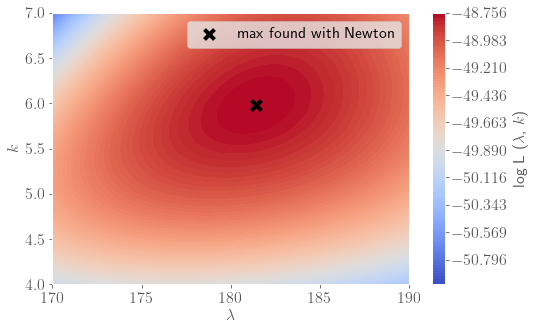

In [5]:
plt.figure(figsize=(8, 5))
k_values = np.linspace(170, 190, 100)
lam_values = np.linspace(4, 7, 100)
k, lam = np.meshgrid(k_values, lam_values)
log_likes = np.array([opt.calculate_log_likelihood(lam_val, k_val) 
                      for lam_val, k_val in zip(k.flatten(), lam.flatten())])



plt.scatter(opt.lam, opt.k, s=100, color='black', marker='x', zorder=3, label='max found with Newton')

c = plt.contourf(k, lam, np.array(log_likes).reshape(lam.shape), levels=np.linspace(-51, log_likes.max(), 100),  cmap='coolwarm')
cbar = plt.colorbar()
plt.xlabel('$\lambda$')
plt.ylabel('$k$');
cbar.set_label(r'log L ($\lambda$, $k$)')
plt.legend()
plt.savefig('figures/mle_weibull.png', dpi=300, bbox_inches='tight');


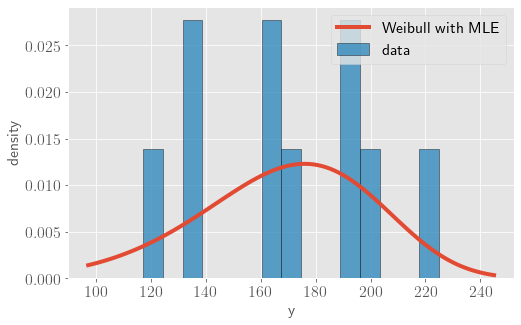

In [6]:
plt.figure(figsize=(8, 5))
dist = weibull_min(c=opt.k, scale=opt.lam)
x = np.linspace(data.min() - 20, data.max() + 20, 100)
plt.plot(x, dist.pdf(x), label='Weibull with MLE')
plt.hist(data, density=True, edgecolor='black', alpha=.8, bins=15, label='data')
plt.xlabel('y')
plt.ylabel('density')
plt.legend()
plt.savefig('figures/weibull_data_fit.png', dpi=300, bbox_inches='tight');

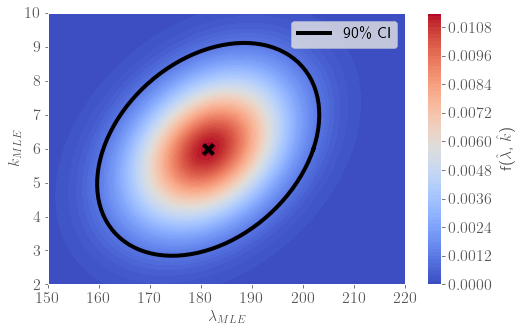

In [9]:
plt.figure(figsize=(8, 5))
info_matrix = -opt.calculate_hessian(*params)
se_dist = multivariate_normal(params, np.linalg.inv(info_matrix))
k_values = np.linspace(150, 220, 110)
lam_values = np.linspace(2, 10, 100)
k, lam = np.meshgrid(k_values, lam_values)
x = np.array([k.flatten(), lam.flatten()])
pdf = se_dist.pdf(x.T)
plt.contourf(k_values, lam_values, pdf.reshape(k.shape), cmap='coolwarm', levels=100)
plt.xlabel('$\lambda_{MLE}$')
plt.ylabel('$k_{MLE}$');
cbar = plt.colorbar()
cbar.set_label(r'f($\hat{\lambda}$, $\hat{k}$)')
plt.scatter(opt.lam, opt.k, s=100, color='black', marker='x', zorder=3)

x = []
L = np.linalg.cholesky(info_matrix)
for angle in np.linspace(0, 2*np.pi, 100):
    x.append(params + np.sqrt(chi2(df=2).ppf(.90)) * np.linalg.inv(L.T) @ np.array([np.cos(angle), np.sin(angle)]))
    
x = np.array(x)
plt.plot(x[:, 0], x[:, 1], color='black', label='90\% CI')
plt.legend();
plt.savefig('figures/weibull_se.png', dpi=300, bbox_inches='tight');